In [244]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [245]:
#this function is the numerator of the target distribution
def f(x):
    if x >= 0:
        return  np.exp(-(x/5)**4)
    else: 
        return  np.exp(-(1/10*x)**2+x)

In [246]:
#normal PDF
def g(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

In [247]:
NORM_CONST = 5.51

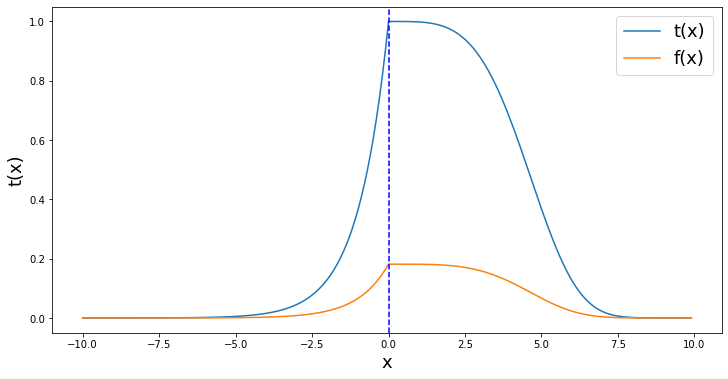

In [249]:
x_vals = np.arange(-10,10,.1)
f_vals = [f(x) for x in x_vals]
p_vals = [f/NORM_CONST for f in f_vals]

plt.figure(figsize=(12,6))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['t(x)', 'f(x)'], fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.ylabel('t(x)', fontsize = 18)
plt.axvline(0, color='b', linestyle='--')

In [233]:
TRUE_EXP = 10.13 / NORM_CONST
print(TRUE_EXP)

1.8384754990925591


Text(0.5, 1.0, 'M=1')

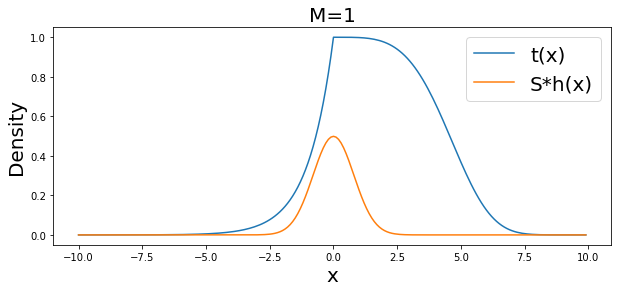

In [268]:
x_vals = np.arange(-10,10,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0, 0.8)
M = 1

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=3')

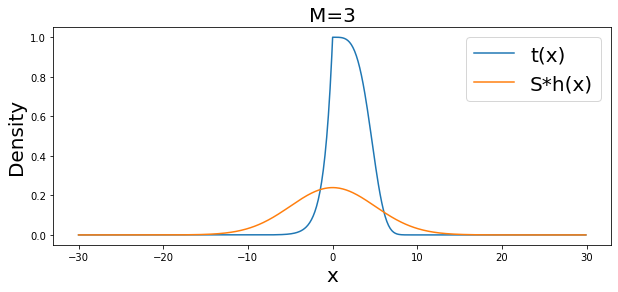

In [284]:
M = 3

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=100')

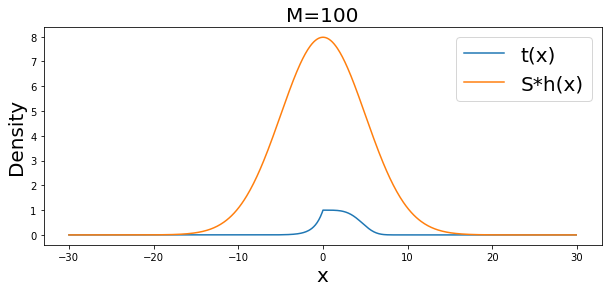

In [283]:
M = 100

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

In [272]:
#collect all accepted samples here
samples = []

#try this many candidates
N = 100000

for _ in range(N):
    #sample a candidate
    candidate = np.random.normal(0, 0.8)
    
    #calculate probability of accepting this candidate
    prob_accept = f(candidate) / (M*g(candidate, 0, 0.8))
    
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

In [273]:
print("Num Samples Collected: %s"%len(samples))

Num Samples Collected: 3462


In [274]:
print("Efficiency: %s"%round(len(samples) / N, 3))

Efficiency: 0.035


Text(0.5, 1.0, 'Empirical Exp. Value: 0.66\nTrue Exp. Value: 1.84')

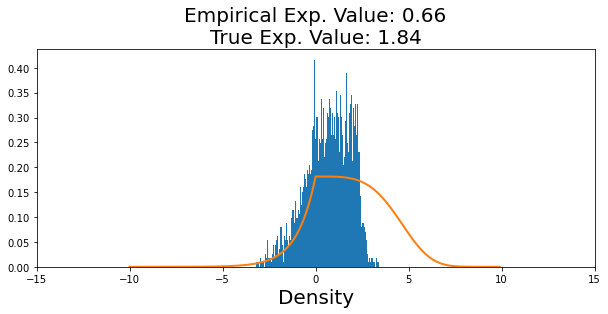

In [260]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=2)
plt.xlim(-15,15)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(samples), 2), round(np.mean(TRUE_EXP), 2)), fontsize=20)

Text(0.5, 1.0, 'M=1')

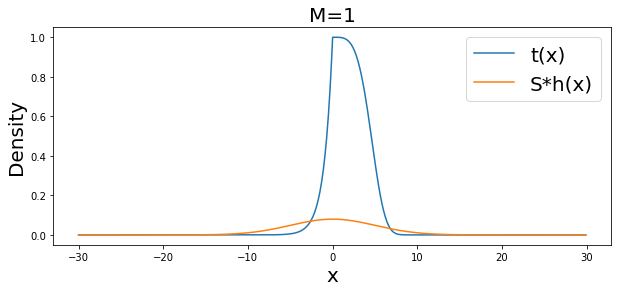

In [282]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0, 5)
M = 1

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=15')

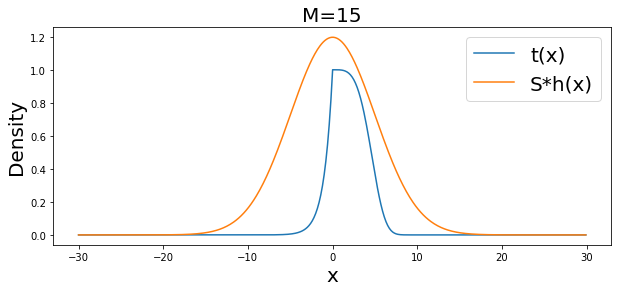

In [281]:
M = 15

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

(0.0, 0.0001)

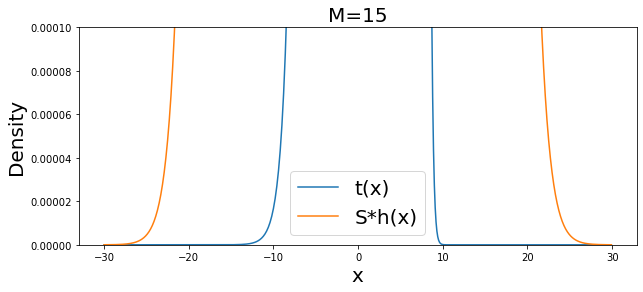

In [280]:
M = 15

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)
plt.ylim(0, 0.0001)

In [285]:
samples = []
N = 100000
for _ in range(N):
    #get a candidate from uniform distribution
    candidate = np.random.normal(0, 5)
    
    #calculate probabailty of accepting this sample
    prob_accept = f(candidate) / (M*g(candidate, 0, 5))
    
    #accept sample with this probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

In [286]:
print("Num Samples Collected: %s"%len(samples))

Num Samples Collected: 59674


In [287]:
print("Efficiency: %s"%round(len(samples) / N, 3))

Efficiency: 0.597


Text(0.5, 1.0, 'Empirical Exp. Value: 1.85\nTrue Exp. Value: 1.84')

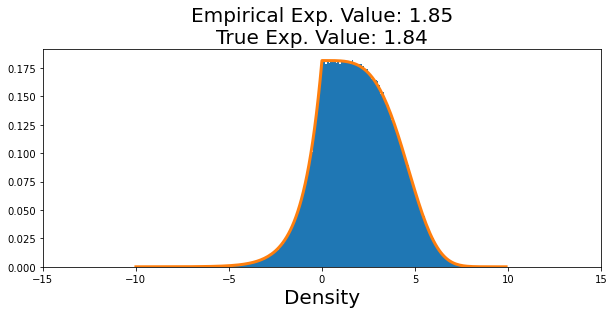

In [234]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=3)
plt.xlim(-15,15)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(samples), 2), round(np.mean(TRUE_EXP), 2)), fontsize=20)

Text(0.5, 1.0, 'Empirical Exp. Value: 1.83\nTrue Exp. Value: 1.84')

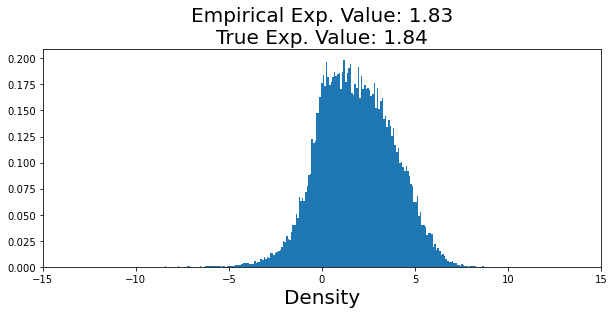

In [265]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
#plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=3)
plt.xlim(-15,15)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(samples), 2), round(np.mean(TRUE_EXP), 2)), fontsize=20)